<a href="https://colab.research.google.com/github/aravindan155/AKumaranProjects/blob/main/Obesity_Associated_Factors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing required packages...
Please upload the ObesityDataSet.csv file when prompted...


Saving ObesityDataSet.csv to ObesityDataSet (5).csv
Uploaded file: ObesityDataSet (5).csv

Checking for missing values:
time_on_devices    0
phys_activ_freq    0
H2O_consum         0
num_main_meals     0
freq_veg_consum    0
Weight             0
Obesity_Level      0
dtype: int64

==== TESTING IF DATA IS NORMALLY DISTRIBUTED ====
Some variables are not normally distributed within groups.
Will perform both parametric MANOVA and non-parametric alternatives.


<Figure size 1200x800 with 0 Axes>

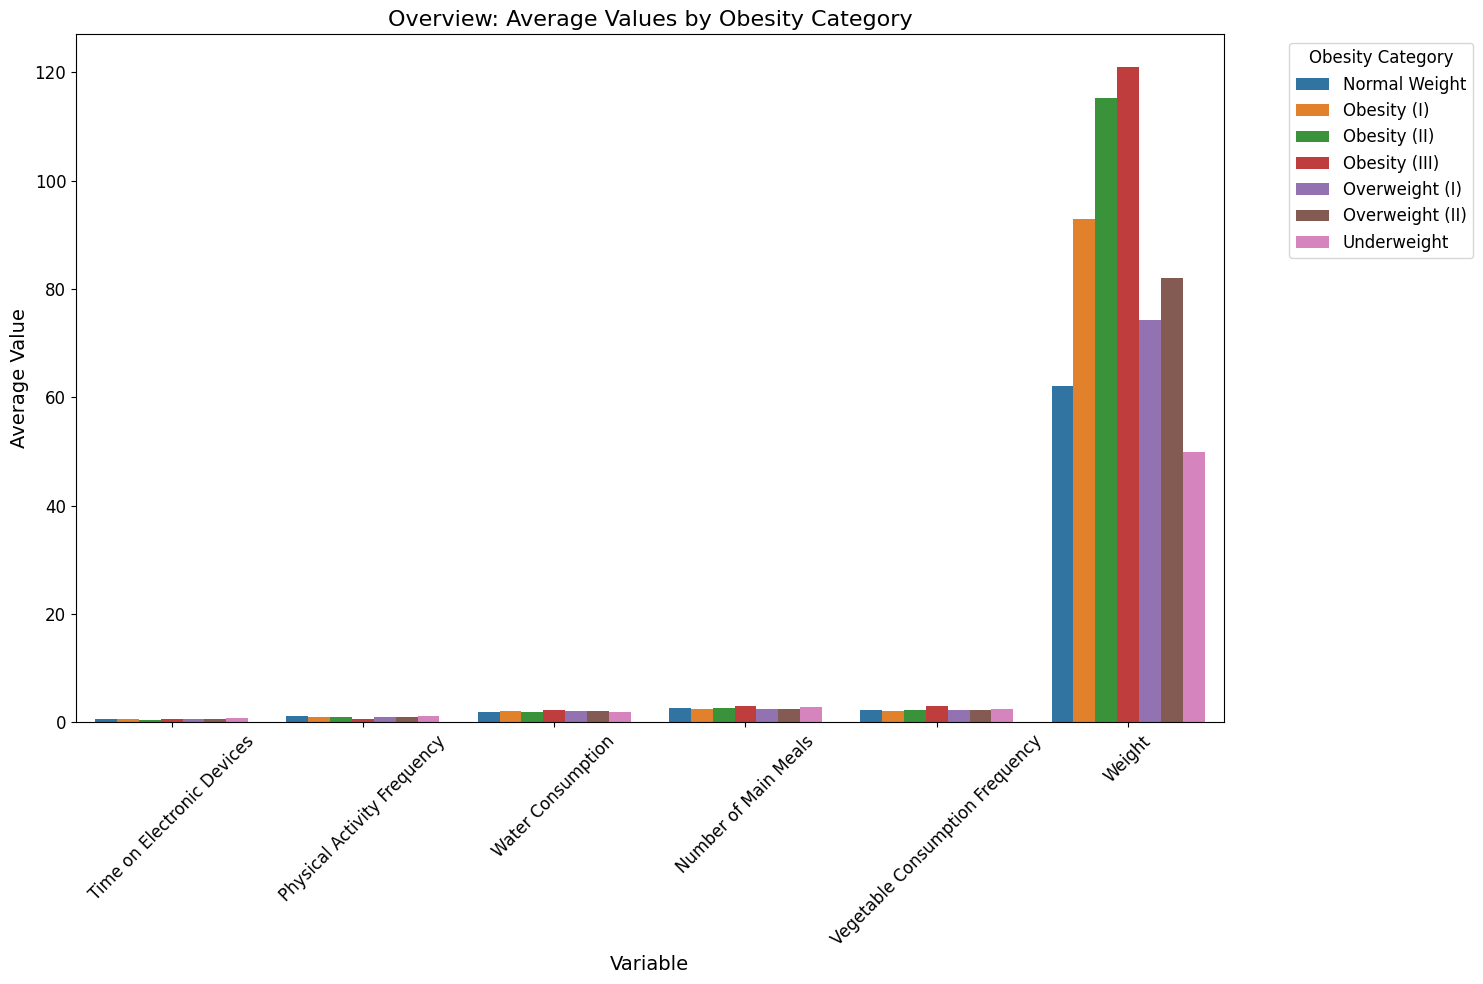


==== MANOVA TEST RESULTS ====
Could not perform MANOVA: "Pillai's trace"

==== INDIVIDUAL VARIABLE ANALYSIS ====
✓ Time on Electronic Devices: Shows significant differences across obesity categories (p=0.0000)
✓ Physical Activity Frequency: Shows significant differences across obesity categories (p=0.0000)
✓ Water Consumption: Shows significant differences across obesity categories (p=0.0000)
✓ Number of Main Meals: Shows significant differences across obesity categories (p=0.0000)
✓ Vegetable Consumption Frequency: Shows significant differences across obesity categories (p=0.0000)
✓ Weight: Shows significant differences across obesity categories (p=0.0000)

Summary of Results:
                     Friendly_Name   Test        p_value  Significant
0       Time on Electronic Devices  ANOVA   2.068782e-08         True
1      Physical Activity Frequency  ANOVA   7.653253e-20         True
2                Water Consumption  ANOVA   2.837324e-18         True
3             Number of Main Mea

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/matplotlib/transforms.py:351: RuntimeWarning: invalid value encountered in scalar subtract
  return points[1, 0] - points[0, 0]


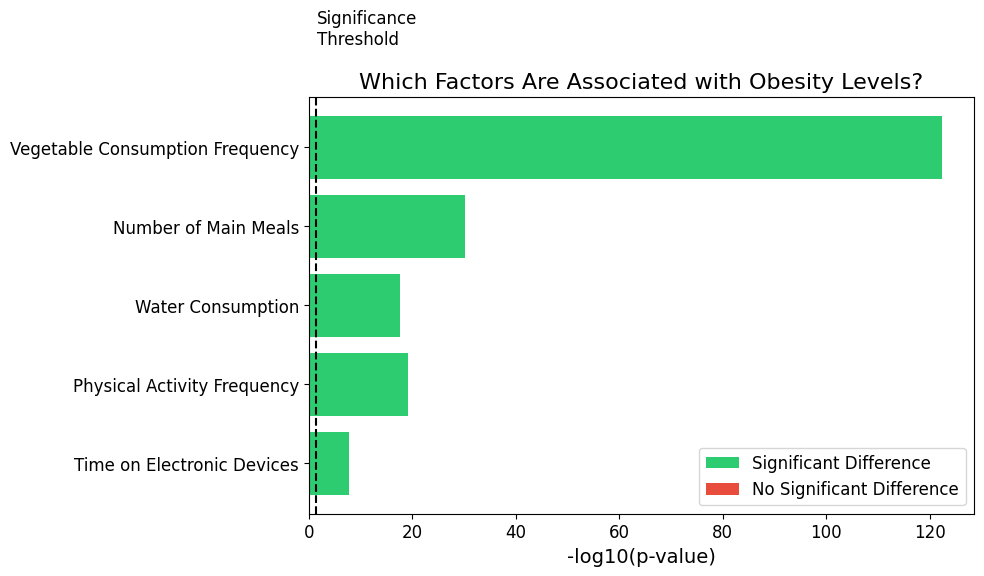

<ipython-input-9-184201745719>:234: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Obesity_Category', y=var, data=df, palette=category_colors)


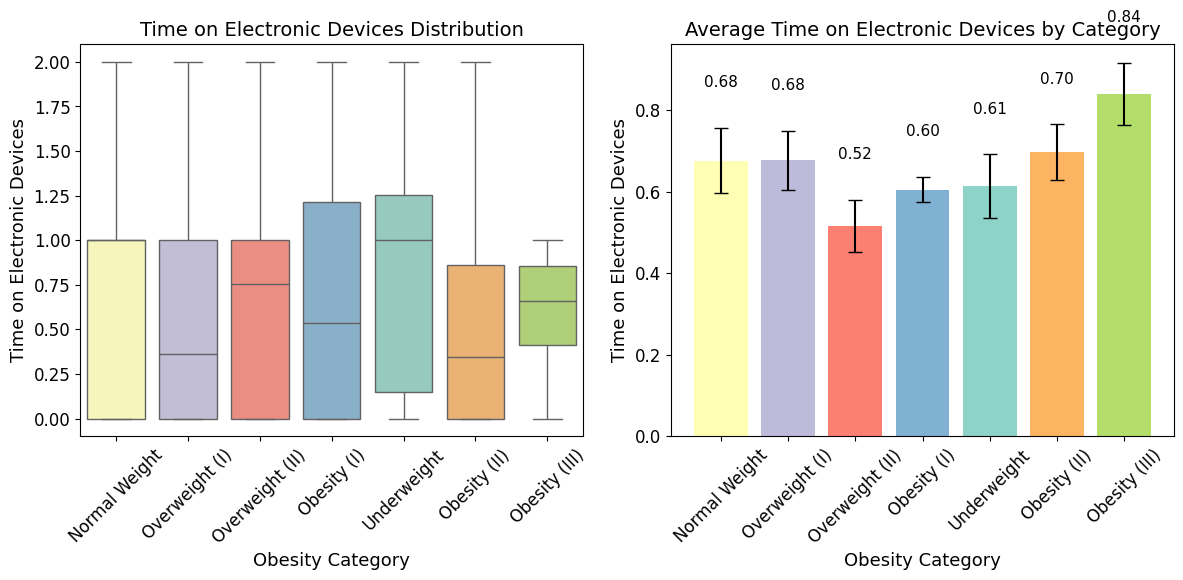

<ipython-input-9-184201745719>:234: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Obesity_Category', y=var, data=df, palette=category_colors)


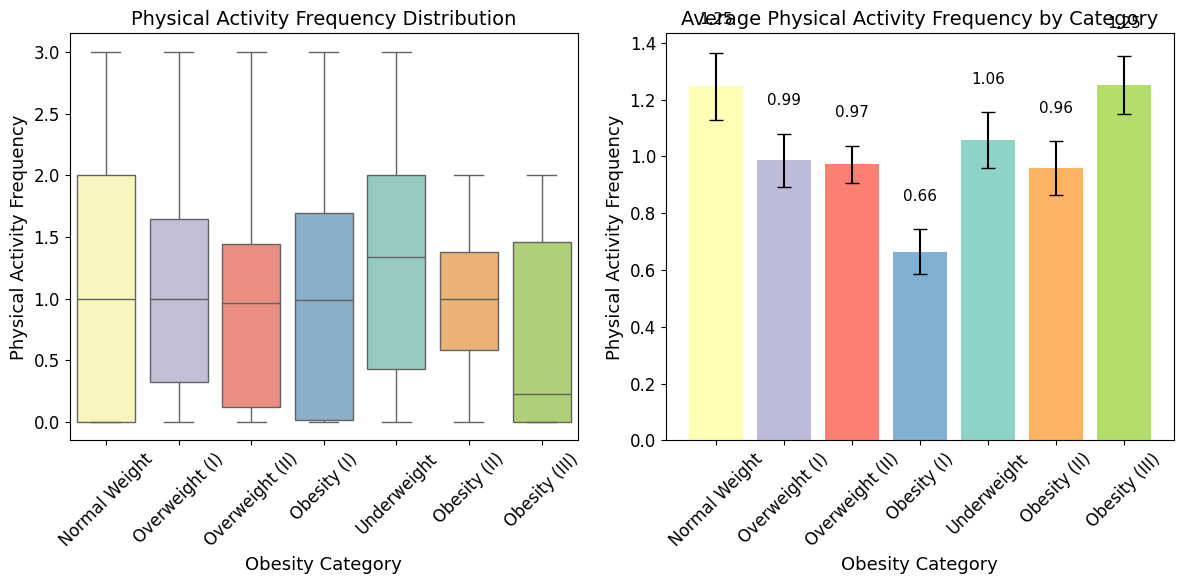

<ipython-input-9-184201745719>:234: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Obesity_Category', y=var, data=df, palette=category_colors)


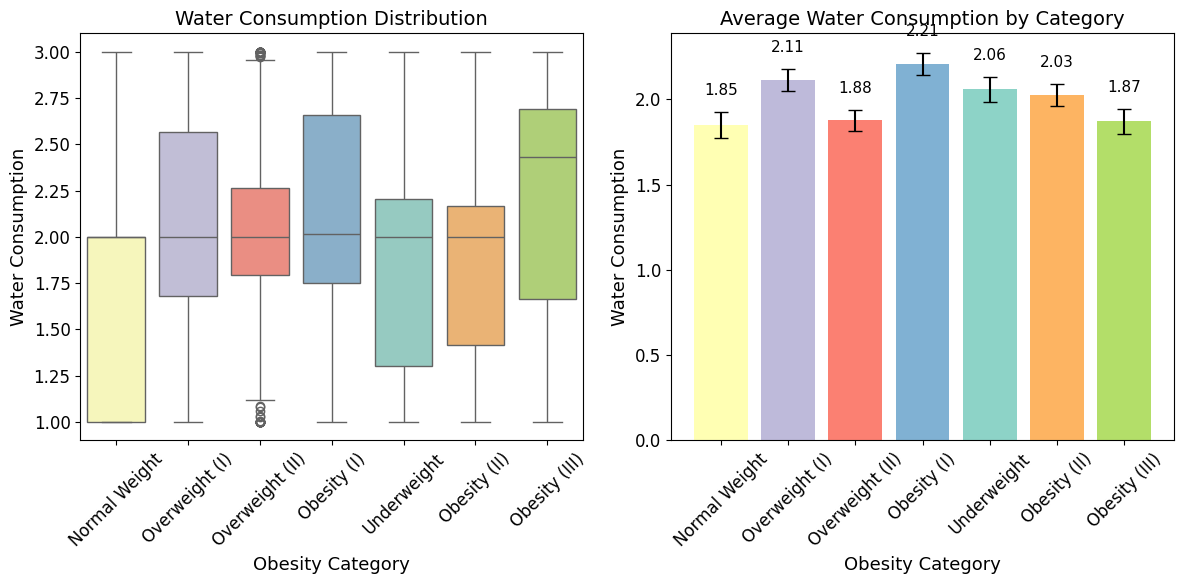

<ipython-input-9-184201745719>:234: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Obesity_Category', y=var, data=df, palette=category_colors)


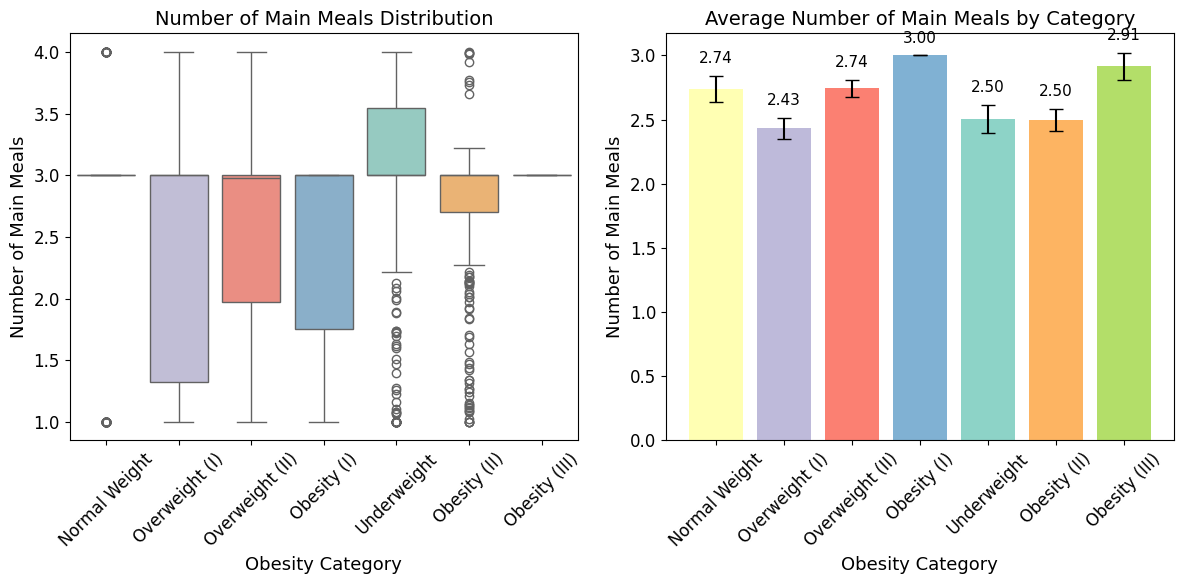

<ipython-input-9-184201745719>:234: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Obesity_Category', y=var, data=df, palette=category_colors)


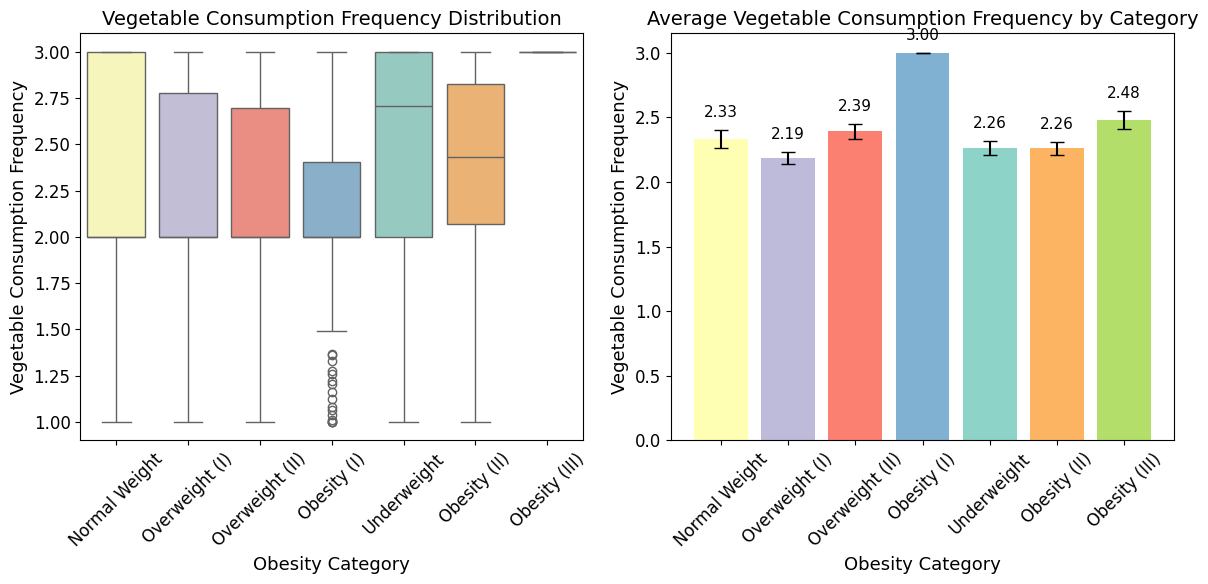

<ipython-input-9-184201745719>:234: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Obesity_Category', y=var, data=df, palette=category_colors)


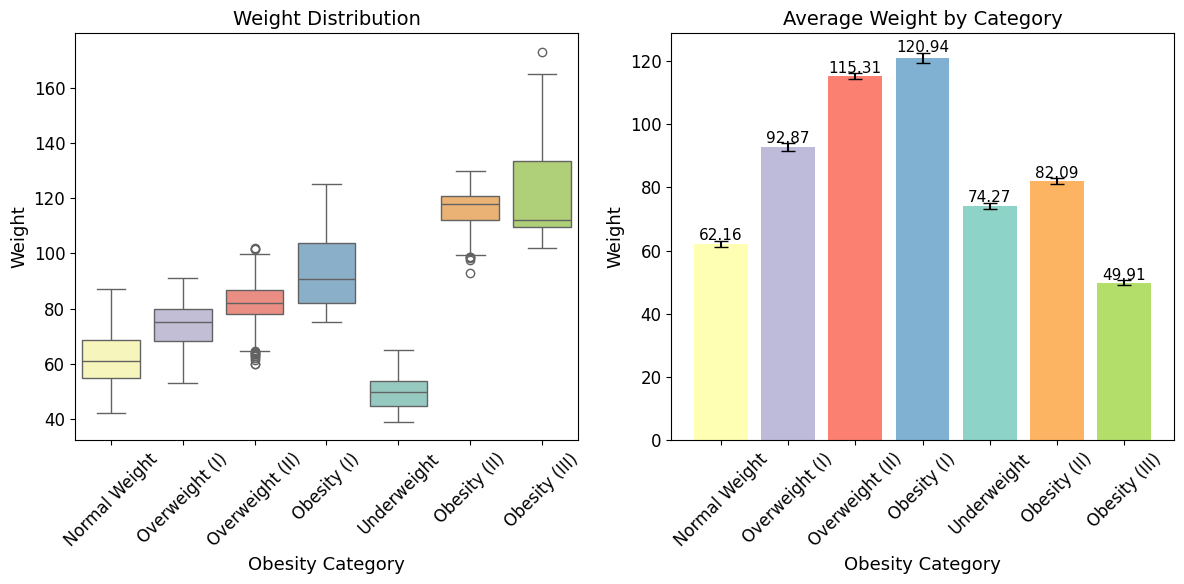

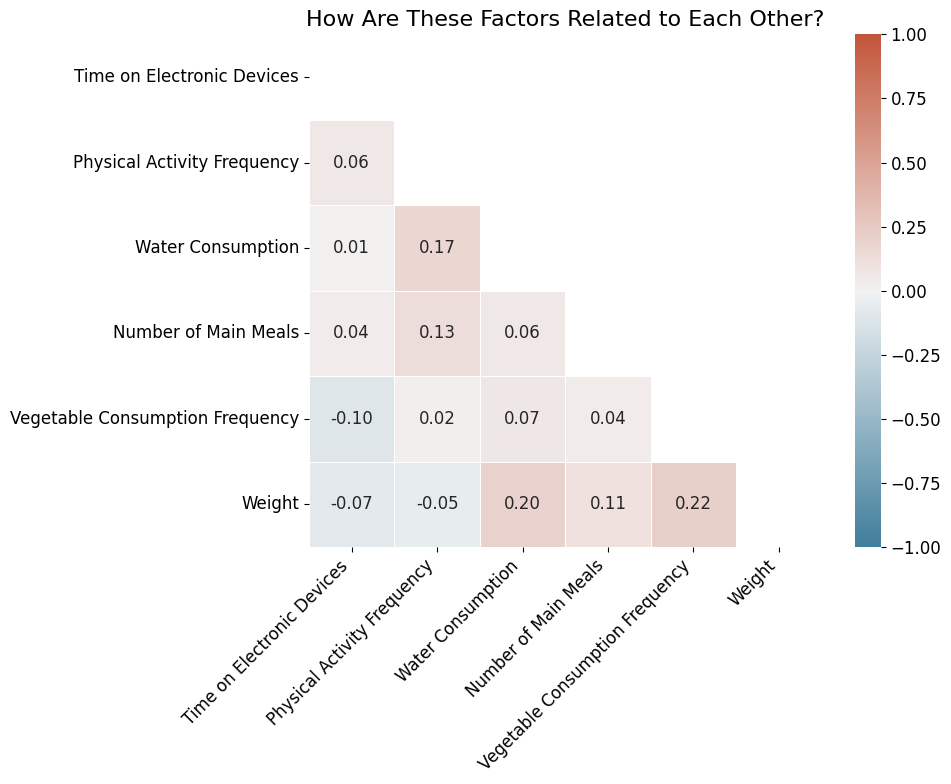

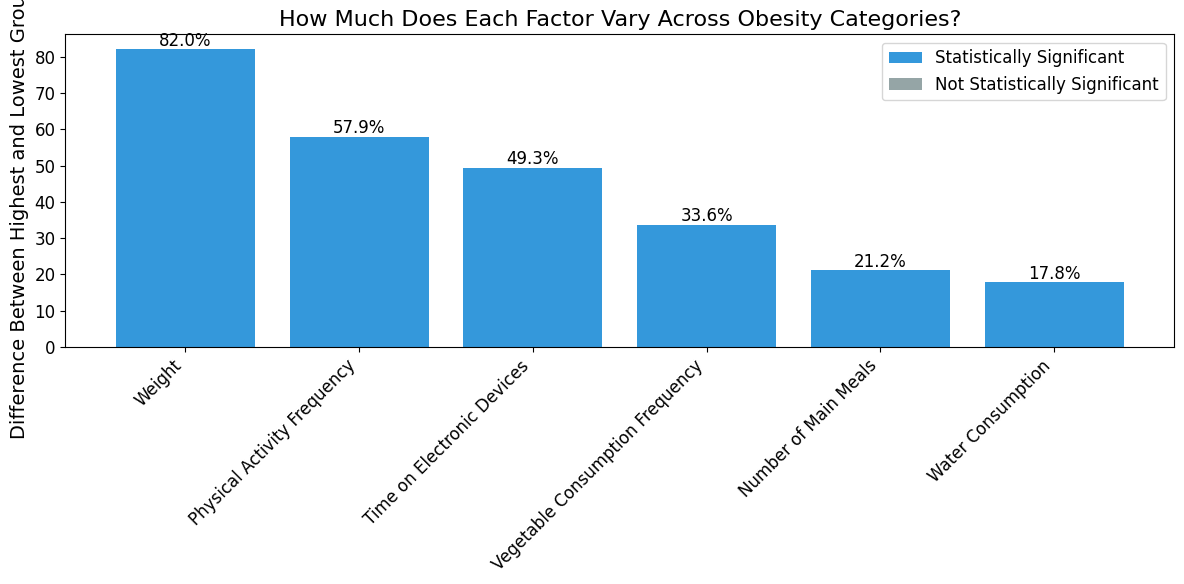


Analysis complete! The visualizations provide an accessible summary of the findings.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io
import scipy.stats as stats
from statsmodels.multivariate.manova import MANOVA
from matplotlib.patches import Patch

# First, install any needed packages that aren't preinstalled in Colab
print("Installing required packages...")
!pip install scikit_posthocs -q

# Set more readable font sizes
plt.rcParams.update({'font.size': 12})
plt.rcParams.update({'axes.titlesize': 14})
plt.rcParams.update({'axes.labelsize': 13})

# Step 1: Upload file
print("Please upload the ObesityDataSet.csv file when prompted...")
uploaded = files.upload()

# Step 2: Read the uploaded file using the correct file name
file_name = list(uploaded.keys())[0]
print(f"Uploaded file: {file_name}")
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

# Step 3: Rename the variables as requested
df = df.rename(columns={
    'TUE': 'time_on_devices',
    'FAF': 'phys_activ_freq',
    'CH2O': 'H2O_consum',
    'NCP': 'num_main_meals',
    'FCVC': 'freq_veg_consum',
    'NObeyesdad': 'Obesity_Level'
})

# User-friendly variable names for plotting
friendly_names = {
    'time_on_devices': 'Time on Electronic Devices',
    'phys_activ_freq': 'Physical Activity Frequency',
    'H2O_consum': 'Water Consumption',
    'num_main_meals': 'Number of Main Meals',
    'freq_veg_consum': 'Vegetable Consumption Frequency',
    'Weight': 'Weight'
}

# Step 4: Define dependent variables to analyze
dependent_vars = ['time_on_devices', 'phys_activ_freq', 'H2O_consum', 'num_main_meals', 'freq_veg_consum', 'Weight']

# Step 5: Data preparation - check for missing values
print("\nChecking for missing values:")
print(df[dependent_vars + ['Obesity_Level']].isnull().sum())

# Create more readable labels for obesity levels
df['Obesity_Category'] = df['Obesity_Level'].map({
    'Insufficient_Weight': 'Underweight',
    'Normal_Weight': 'Normal Weight',
    'Overweight_Level_I': 'Overweight (I)',
    'Overweight_Level_II': 'Overweight (II)',
    'Obesity_Type_I': 'Obesity (I)',
    'Obesity_Type_II': 'Obesity (II)',
    'Obesity_Type_III': 'Obesity (III)'
})

# Create a color palette that matches the transformed category names
category_colors = {
    'Underweight': '#8dd3c7',
    'Normal Weight': '#ffffb3',
    'Overweight (I)': '#bebada',
    'Overweight (II)': '#fb8072',
    'Obesity (I)': '#80b1d3',
    'Obesity (II)': '#fdb462',
    'Obesity (III)': '#b3de69'
}

# Step 6: Test for normality in each group (using Shapiro-Wilk)
print("\n==== TESTING IF DATA IS NORMALLY DISTRIBUTED ====")
all_normal = True

for var in dependent_vars:
    for level in df['Obesity_Level'].unique():
        data = df[df['Obesity_Level'] == level][var].dropna()
        if len(data) >= 8 and len(data) <= 5000:
            _, p_value = stats.shapiro(data)
            if p_value < 0.05:
                all_normal = False
                break
    if not all_normal:
        break

if all_normal:
    print("All variables appear to be normally distributed within each group.")
    print("Proceeding with parametric MANOVA analysis.")
else:
    print("Some variables are not normally distributed within groups.")
    print("Will perform both parametric MANOVA and non-parametric alternatives.")

# Step 7: Create an overview visualization of the variables
plt.figure(figsize=(12, 8))

# Create a bar chart showing average values by obesity category
summary_data = df.groupby('Obesity_Category')[dependent_vars].mean().reset_index()
summary_data_melted = pd.melt(summary_data, id_vars=['Obesity_Category'],
                              value_vars=dependent_vars,
                              var_name='Variable', value_name='Average Value')

# Create a summary bar chart
plt.figure(figsize=(15, 10))
sns.barplot(data=summary_data_melted, x='Variable', y='Average Value', hue='Obesity_Category')
plt.title('Overview: Average Values by Obesity Category', fontsize=16)
plt.xlabel('Variable', fontsize=14)
plt.ylabel('Average Value', fontsize=14)
plt.xticks(ticks=range(len(dependent_vars)), labels=[friendly_names[var] for var in dependent_vars], rotation=45)
plt.legend(title='Obesity Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
try:
    plt.savefig('overview.png', dpi=300, bbox_inches='tight')
except:
    print("Could not save overview figure")
plt.show()

# Step 8: Perform MANOVA test
print("\n==== MANOVA TEST RESULTS ====")
formula = ' + '.join(dependent_vars) + ' ~ Obesity_Level'

try:
    manova = MANOVA.from_formula(formula, data=df)
    manova_results = manova.mv_test()

    # Extract p-value
    pillai_p = manova_results.results['Obesity_Level']['stat']['Pillai\'s trace']['Pr > F'][0]

    # Simplified explanation
    if pillai_p < 0.05:
        print(f"RESULT: The analysis indicates that obesity levels ARE associated with differences")
        print(f"in at least some lifestyle and physical factors (p-value: {pillai_p:.4f}).")
        manova_significant = True
    else:
        print(f"RESULT: The analysis indicates that obesity levels are NOT associated with differences")
        print(f"in lifestyle and physical factors (p-value: {pillai_p:.4f}).")
        manova_significant = False
except Exception as e:
    print(f"Could not perform MANOVA: {e}")
    manova_significant = False

# Step 9: Perform follow-up tests for each variable
print("\n==== INDIVIDUAL VARIABLE ANALYSIS ====")
significant_vars = []
results_summary = []

for var in dependent_vars:
    # First try parametric ANOVA
    groups = [df[df['Obesity_Level'] == level][var].dropna() for level in df['Obesity_Level'].unique()]

    try:
        # ANOVA
        f_stat, p_value = stats.f_oneway(*groups)
        test_type = "ANOVA"
    except:
        # If ANOVA fails, try Kruskal-Wallis
        try:
            h_stat, p_value = stats.kruskal(*groups)
            test_type = "Kruskal-Wallis"
        except:
            print(f"Could not analyze {friendly_names[var]}")
            continue

    # Store results
    is_significant = p_value < 0.05
    if is_significant:
        significant_vars.append(var)

    results_summary.append({
        'Variable': var,
        'Friendly_Name': friendly_names[var],
        'Test': test_type,
        'p_value': p_value,
        'Significant': is_significant
    })

    # Print simplified result
    if is_significant:
        print(f"✓ {friendly_names[var]}: Shows significant differences across obesity categories (p={p_value:.4f})")
    else:
        print(f"✗ {friendly_names[var]}: No significant differences across obesity categories (p={p_value:.4f})")

# Convert to DataFrame for easy display
results_df = pd.DataFrame(results_summary)
print("\nSummary of Results:")
print(results_df[['Friendly_Name', 'Test', 'p_value', 'Significant']])

# Step a: Create an intuitive bar chart showing significance
plt.figure(figsize=(10, 6))

# Create color-coded bars for p-values
colors = ['#2ecc71' if sig else '#e74c3c' for sig in results_df['Significant']]
bars = plt.barh(results_df['Friendly_Name'], -np.log10(results_df['p_value']), color=colors)

# Add vertical line at significance threshold (-log10(0.05) ≈ 1.3)
plt.axvline(x=-np.log10(0.05), color='black', linestyle='--')

# Add labels and title
plt.xlabel('-log10(p-value)', fontsize=14)
plt.title('Which Factors Are Associated with Obesity Levels?', fontsize=16)

# Add explanation text
plt.text(-np.log10(0.05) + 0.2, len(results_df) - 0.5, 'Significance\nThreshold', ha='left', va='center')
plt.text(max(-np.log10(results_df['p_value'])) * 0.9, 0.5, 'More Significant', ha='right')

# Add a legend
legend_elements = [
    Patch(facecolor='#2ecc71', label='Significant Difference'),
    Patch(facecolor='#e74c3c', label='No Significant Difference')
]
plt.legend(handles=legend_elements, loc='lower right')

plt.tight_layout()
try:
    plt.savefig('significance.png', dpi=300, bbox_inches='tight')
except:
    print("Could not save significance figure")
plt.show()

# Step b: Create detailed visualizations for significant variables
if significant_vars:
    # For each significant variable, create an easy-to-understand visualization
    for var in significant_vars:
        plt.figure(figsize=(12, 6))

        # Create subplot layout: left for boxplot, right for bar chart
        plt.subplot(1, 2, 1)
        sns.boxplot(x='Obesity_Category', y=var, data=df, palette=category_colors)
        plt.title(f'{friendly_names[var]} Distribution', fontsize=14)
        plt.ylabel(friendly_names[var], fontsize=13)
        plt.xlabel('Obesity Category', fontsize=13)
        plt.xticks(rotation=45)

        # Right side: bar chart with confidence intervals
        plt.subplot(1, 2, 2)

        # Calculate mean and confidence interval
        means = df.groupby('Obesity_Category')[var].mean()
        ci = df.groupby('Obesity_Category')[var].std() / np.sqrt(df.groupby('Obesity_Category')[var].count()) * 1.96

        # Create bar chart
        categories = df['Obesity_Category'].unique()

        bars = plt.bar(range(len(categories)), means.values, yerr=ci, capsize=5,
                       color=[category_colors[cat] for cat in categories])

        # Add mean values on top of bars
        for i, bar in enumerate(bars):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + ci.iloc[i] + 0.1,
                    f'{means.iloc[i]:.2f}', ha='center', fontsize=11)

        plt.title(f'Average {friendly_names[var]} by Category', fontsize=14)
        plt.ylabel(friendly_names[var], fontsize=13)
        plt.xlabel('Obesity Category', fontsize=13)
        plt.xticks(range(len(categories)), categories, rotation=45)

        plt.tight_layout()
        try:
            plt.savefig(f'{var}_analysis.png', dpi=300, bbox_inches='tight')
        except:
            print(f"Could not save figure for {var}")
        plt.show()

# Step c: Create a correlation chart for all variables
plt.figure(figsize=(10, 8))
correlation_matrix = df[dependent_vars].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            annot=True, fmt=".2f", square=True, linewidths=.5)

plt.title('How Are These Factors Related to Each Other?', fontsize=16)

# Use friendly names for axes
plt.xticks(ticks=np.arange(len(dependent_vars)) + 0.5,
           labels=[friendly_names[var] for var in dependent_vars], rotation=45, ha='right')
plt.yticks(ticks=np.arange(len(dependent_vars)) + 0.5,
           labels=[friendly_names[var] for var in dependent_vars], rotation=0)

plt.tight_layout()
try:
    plt.savefig('correlation.png', dpi=300, bbox_inches='tight')
except:
    print("Could not save correlation figure")
plt.show()

# Step d: Create an easy-to-understand summary visualization
# This will show effect sizes for significant variables
plt.figure(figsize=(12, 6))

# Calculate effect sizes (simplified approach using differences between max and min groups)
effect_sizes = []

for var in dependent_vars:
    # Get mean values by group
    group_means = df.groupby('Obesity_Category')[var].mean()

    # Calculate max difference as a percentage of the overall mean
    max_diff = (group_means.max() - group_means.min())
    overall_mean = df[var].mean()
    effect_pct = (max_diff / overall_mean) * 100

    # Is this variable significant?
    is_sig = var in significant_vars

    effect_sizes.append({
        'Variable': var,
        'Friendly_Name': friendly_names[var],
        'Effect_Size_Pct': effect_pct,
        'Significant': is_sig
    })

# Convert to DataFrame and sort
effect_df = pd.DataFrame(effect_sizes)
effect_df = effect_df.sort_values('Effect_Size_Pct', ascending=False)

# Create bar chart of effect sizes
colors = ['#3498db' if sig else '#95a5a6' for sig in effect_df['Significant']]
plt.bar(effect_df['Friendly_Name'], effect_df['Effect_Size_Pct'], color=colors)

# Add labels
plt.title('How Much Does Each Factor Vary Across Obesity Categories?', fontsize=16)
plt.ylabel('Difference Between Highest and Lowest Group (%)', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Add value labels on bars
for i, v in enumerate(effect_df['Effect_Size_Pct']):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center')

# Add a legend
legend_elements = [
    Patch(facecolor='#3498db', label='Statistically Significant'),
    Patch(facecolor='#95a5a6', label='Not Statistically Significant')
]
plt.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
try:
    plt.savefig('effect_sizes.png', dpi=300, bbox_inches='tight')
except:
    print("Could not save effect sizes figure")
plt.show()

print("\nAnalysis complete! The visualizations provide an accessible summary of the findings.")

Please upload the ObesityDataSet.csv file when prompted...


Saving ObesityDataSet.csv to ObesityDataSet (2).csv
Uploaded file: ObesityDataSet (2).csv

Unique values in Obesity_Level: ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']

Counts of Obesity_Level categories:
Obesity_Level
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


==== NORMALITY TESTS ====

Testing normality for Family History of Overweight:
  Category 'yes' - Shapiro-Wilk test: p-value = 0.0000
  Category 'yes' - D'Agostino's K² test: p-value = 0.0000
  Category 'yes': Data does NOT appear normally distributed
  Category 'no' - Shapiro-Wilk test: p-value = 0.0000
  Category 'no' - D'Agostino's K² test: p-value = 0.0000
  Category 'no': Data does NOT appear normally distributed

Testing normality for Frequent High-Calorie Foo

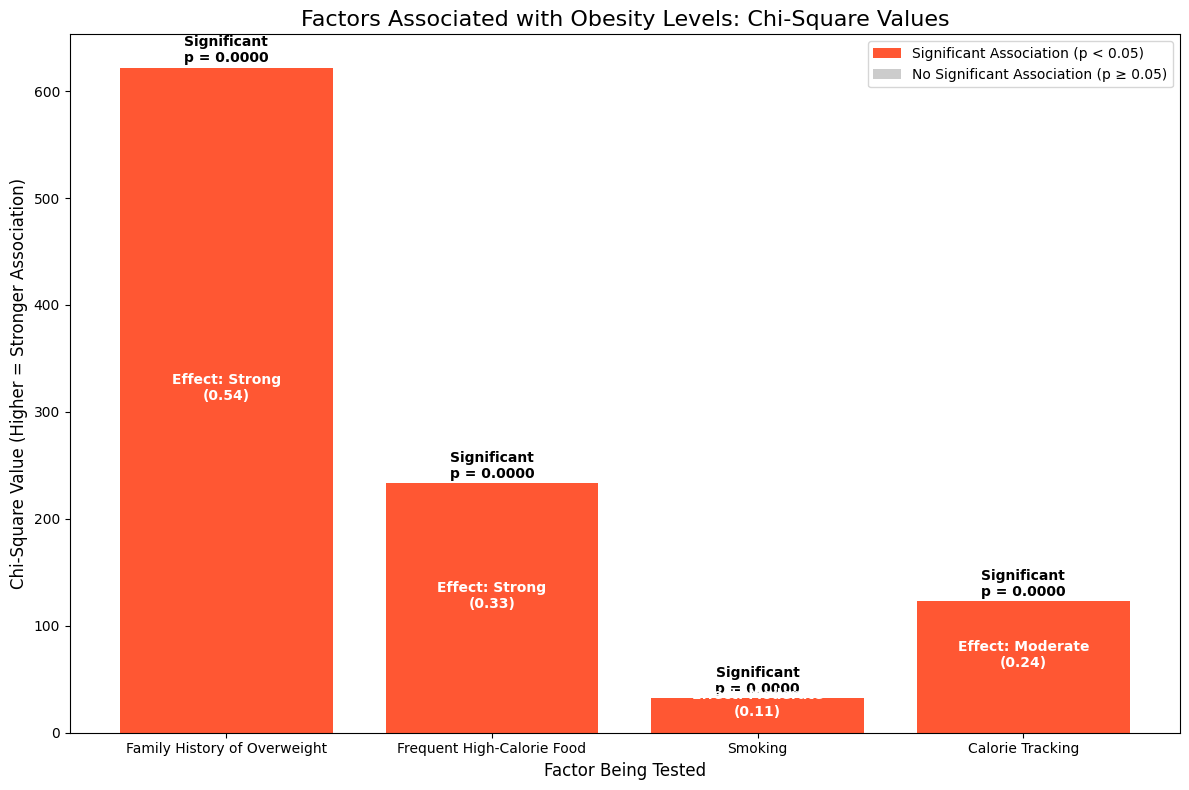

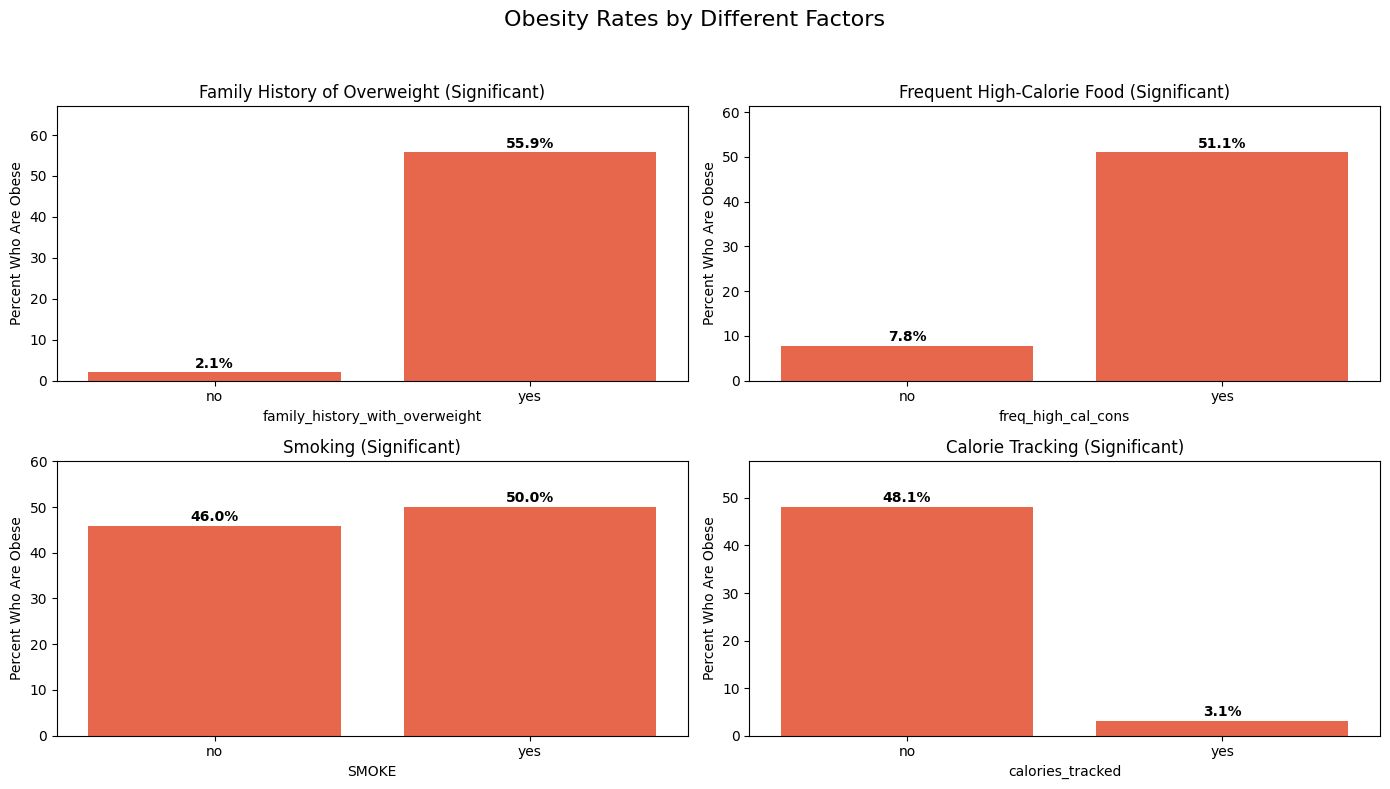

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, shapiro, normaltest, chisquare
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
from google.colab import files
import io

# Step 1: Upload file
print("Please upload the ObesityDataSet.csv file when prompted...")
uploaded = files.upload()

# Step 2: Read the uploaded file using the correct file name
# Get the first file name from the uploaded dictionary
file_name = list(uploaded.keys())[0]
print(f"Uploaded file: {file_name}")
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

# Step 3: Rename the variables as requested
df = df.rename(columns={
    'FAVC': 'freq_high_cal_cons',
    'SCC': 'calories_tracked',
    'NObeyesdad': 'Obesity_Level'
})

# Step 4: Examine the distribution of Obesity_Level
print("\nUnique values in Obesity_Level:", df['Obesity_Level'].unique())
print("\nCounts of Obesity_Level categories:")
print(df['Obesity_Level'].value_counts())

# Step 5: Create binary obesity variable for easier analysis
obesity_categories = {
    'Insufficient_Weight': 'Not Obese',
    'Normal_Weight': 'Not Obese',
    'Overweight_Level_I': 'Not Obese',
    'Overweight_Level_II': 'Not Obese',
    'Obesity_Type_I': 'Obese',
    'Obesity_Type_II': 'Obese',
    'Obesity_Type_III': 'Obese'
}
df['binary_obesity'] = df['Obesity_Level'].map(obesity_categories)

# Step 6: Define variables to analyze
independent_vars = ['family_history_with_overweight', 'freq_high_cal_cons', 'SMOKE', 'calories_tracked']
significance_threshold = 0.05

# Step 7: Define friendly names for variables
friendly_names = {
    'family_history_with_overweight': 'Family History of Overweight',
    'freq_high_cal_cons': 'Frequent High-Calorie Food',
    'SMOKE': 'Smoking',
    'calories_tracked': 'Calorie Tracking'
}

# Step 8: Test for normality in each category
print("\n\n==== NORMALITY TESTS ====")
# Create dummy variables for categorical variables to test normality
for var in independent_vars:
    print(f"\nTesting normality for {friendly_names[var]}:")

    # Get binary indicator for each category
    categories = df[var].unique()

    for category in categories:
        # Create indicator for this category
        category_indicator = (df[var] == category).astype(int)

        # Check if we have enough data points for Shapiro-Wilk test
        if len(category_indicator) < 3:
            print(f"  Category '{category}': Not enough data for normality test")
            continue

        # Shapiro-Wilk test (better for smaller samples)
        if len(category_indicator) <= 5000:  # Shapiro has a sample size limit
            stat, p_shapiro = shapiro(category_indicator)
            print(f"  Category '{category}' - Shapiro-Wilk test: p-value = {p_shapiro:.4f}")
            is_normal_shapiro = p_shapiro > 0.05

            # D'Agostino's K-squared test
            stat, p_dagostino = normaltest(category_indicator)
            print(f"  Category '{category}' - D'Agostino's K² test: p-value = {p_dagostino:.4f}")
            is_normal_dagostino = p_dagostino > 0.05

            # Interpretation
            if is_normal_shapiro and is_normal_dagostino:
                print(f"  Category '{category}': Data appears normally distributed")
            else:
                print(f"  Category '{category}': Data does NOT appear normally distributed")
        else:
            # For large samples, only use D'Agostino's test
            stat, p_dagostino = normaltest(category_indicator)
            print(f"  Category '{category}' - D'Agostino's K² test: p-value = {p_dagostino:.4f}")
            is_normal = p_dagostino > 0.05
            if is_normal:
                print(f"  Category '{category}': Data appears normally distributed")
            else:
                print(f"  Category '{category}': Data does NOT appear normally distributed")

# Step 9: Store results
results = []

# Step 10: Function to calculate Cramer's V for effect size
def cramers_v(contingency_table):
    chi2 = chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    phi2 = chi2/n
    r, k = contingency_table.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1), (rcorr-1)))

# Step 11: Perform chi-square tests for each variable
print("\n\n==== CHI-SQUARE TESTS ====")
for var in independent_vars:
    print(f"\n\nChi-Square Test: {friendly_names[var]} vs Obesity_Level")
    print("-" * 50)

    # Create a contingency table
    contingency_table = pd.crosstab(df[var], df['Obesity_Level'])
    print("\nContingency Table:")
    print(contingency_table)

    # First, use standard chi-square test of independence
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Calculate Cramer's V for effect size
    v = cramers_v(contingency_table)

    # Store results
    results.append({
        'Variable': friendly_names[var],
        'Chi-Square': chi2,
        'p-value': p,
        'Significant': p < significance_threshold,
        'Effect Size': v
    })

    # Print the standard chi-square results
    print(f"\nStandard Chi-square test of independence:")
    print(f"Chi-square statistic: {chi2:.4f}")
    print(f"p-value: {p:.4f}")
    print(f"Degrees of freedom: {dof}")

    # Interpret the result
    if p < significance_threshold:
        print(f"Result: There is a significant association between {friendly_names[var]} and Obesity_Level (p < {significance_threshold})")
    else:
        print(f"Result: There is no significant association between {friendly_names[var]} and Obesity_Level (p > {significance_threshold})")

    # Calculate expected frequencies
    print("\nExpected Frequencies:")
    print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))

    # Check if any expected frequency is less than 5 (a requirement for chi-square)
    if (expected < 5).any():
        print("\nNote: Some expected frequencies are less than 5. Fisher's exact test might be more appropriate.")

    # Calculate residuals (observed - expected)
    residuals = contingency_table.values - expected
    standardized_residuals = residuals / np.sqrt(expected)

    print("\nStandardized Residuals:")
    print(pd.DataFrame(standardized_residuals, index=contingency_table.index, columns=contingency_table.columns))

    # Check for cells with large residuals
    large_residuals = np.abs(standardized_residuals) > 2
    if large_residuals.any():
        print("\nCells with significant contributions (|std.residual| > 2):")
        for i, row_idx in enumerate(contingency_table.index):
            for j, col_idx in enumerate(contingency_table.columns):
                if np.abs(standardized_residuals[i, j]) > 2:
                    print(f"  {row_idx} x {col_idx}: {standardized_residuals[i, j]:.2f}")

# Step 12: Convert results to DataFrame
results_df = pd.DataFrame(results)
print("\n\nSummary of Chi-Square Test Results:")
print(results_df)

# Step 13: Create a visual summary of the chi-square tests
plt.figure(figsize=(12, 8))

# Create a color palette with red for significant and gray for non-significant
colors = ['#FF5733' if sig else '#CCCCCC' for sig in results_df['Significant']]

# Bar plot of chi-square values
bars = plt.bar(results_df['Variable'], results_df['Chi-Square'], color=colors)

# Add significance markers and p-values
for i, (sig, pval) in enumerate(zip(results_df['Significant'], results_df['p-value'])):
    if sig:
        plt.text(i, results_df['Chi-Square'][i] + 5, f'Significant\np = {pval:.4f}',
                 ha='center', fontweight='bold')
    else:
        plt.text(i, results_df['Chi-Square'][i] + 5, f'Not Significant\np = {pval:.4f}',
                 ha='center')

# Add effect size labels
for i, v in enumerate(results_df['Effect Size']):
    strength = ""
    if v < 0.1:
        strength = "Weak"
    elif v < 0.3:
        strength = "Moderate"
    else:
        strength = "Strong"

    plt.text(i, results_df['Chi-Square'][i]/2, f"Effect: {strength}\n({v:.2f})",
             ha='center', color='white', fontweight='bold')

# Title and labels
plt.title('Factors Associated with Obesity Levels: Chi-Square Values', fontsize=16)
plt.ylabel('Chi-Square Value (Higher = Stronger Association)', fontsize=12)
plt.xlabel('Factor Being Tested', fontsize=12)

# Add a legend
legend_elements = [
    Patch(facecolor='#FF5733', label='Significant Association (p < 0.05)'),
    Patch(facecolor='#CCCCCC', label='No Significant Association (p ≥ 0.05)')
]
plt.legend(handles=legend_elements, loc='upper right')
plt.tight_layout()
plt.show()

# Step 14: Create a visualization that shows the percentage of people who are obese by each factor
plt.figure(figsize=(14, 8))

for i, var in enumerate(independent_vars):
    # Check if we have a reasonable number of categories
    if df[var].nunique() <= 5:
        # Calculate percentage of obesity by each category
        obesity_by_factor = df.groupby(var)['binary_obesity'].apply(lambda x: (x == 'Obese').mean() * 100).reset_index()
        obesity_by_factor.columns = [var, 'Obesity_Percentage']

        # Create subplot
        plt.subplot(2, 2, i+1)

        # Get result significance
        is_significant = results_df[results_df['Variable'] == friendly_names[var]]['Significant'].values[0]

        # Bar color based on significance
        bar_color = '#FF5733' if is_significant else '#CCCCCC'

        # Create bars
        barplot = sns.barplot(x=var, y='Obesity_Percentage', data=obesity_by_factor, color=bar_color)

        # Add percent labels
        for j, p in enumerate(obesity_by_factor['Obesity_Percentage']):
            plt.text(j, p + 1, f"{p:.1f}%", ha='center', fontweight='bold')

        # Adjust plot
        plt.title(friendly_names[var] + (" (Significant)" if is_significant else " (Not Significant)"))
        plt.ylabel('Percent Who Are Obese')
        plt.ylim(0, max(obesity_by_factor['Obesity_Percentage'].max() * 1.2, 50))  # Set reasonable y-axis scale

plt.suptitle('Obesity Rates by Different Factors', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the title
plt.show()

Please upload the ObesityDataSet.csv file when prompted...


Saving ObesityDataSet.csv to ObesityDataSet (6).csv
Uploaded file: ObesityDataSet (6).csv

Checking for missing values:
cons_food_btwn_meals    0
cons_alc                0
transp_type             0
Obesity_Level           0
dtype: int64

==== NORMALITY TESTS ====

Testing normality for Food Between Meals:
  cons_food_btwn_meals_Always - Shapiro-Wilk test: p-value = 0.0000
    This category does NOT appear normally distributed
  cons_food_btwn_meals_Frequently - Shapiro-Wilk test: p-value = 0.0000
    This category does NOT appear normally distributed
  cons_food_btwn_meals_Sometimes - Shapiro-Wilk test: p-value = 0.0000
    This category does NOT appear normally distributed
  cons_food_btwn_meals_no - Shapiro-Wilk test: p-value = 0.0000
    This category does NOT appear normally distributed

Testing normality for Alcohol Consumption:
  cons_alc_Always - Shapiro-Wilk test: p-value = 0.0000
    This category does NOT appear normally distributed
  cons_alc_Frequently - Shapiro-Wilk test: 

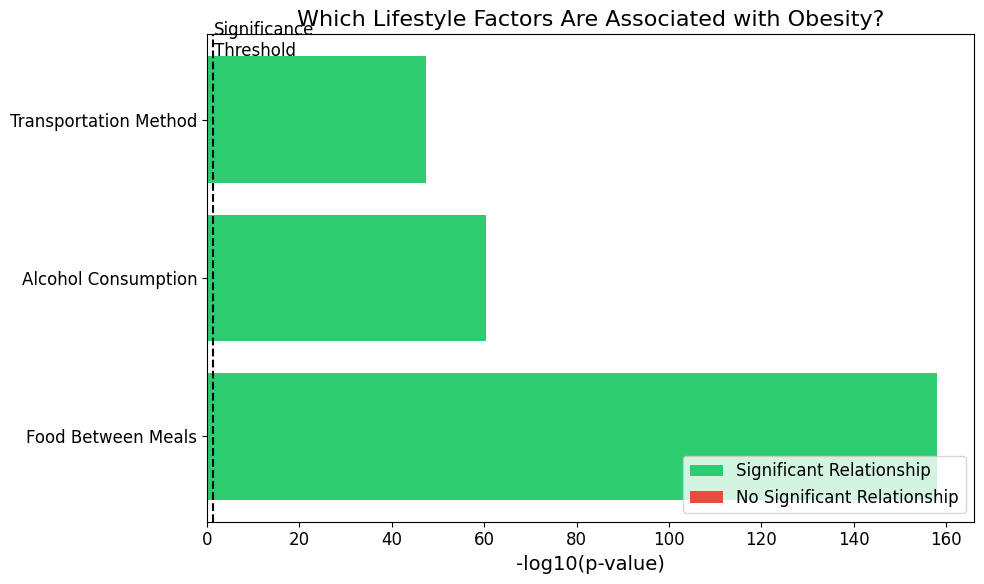

<Figure size 1200x800 with 0 Axes>

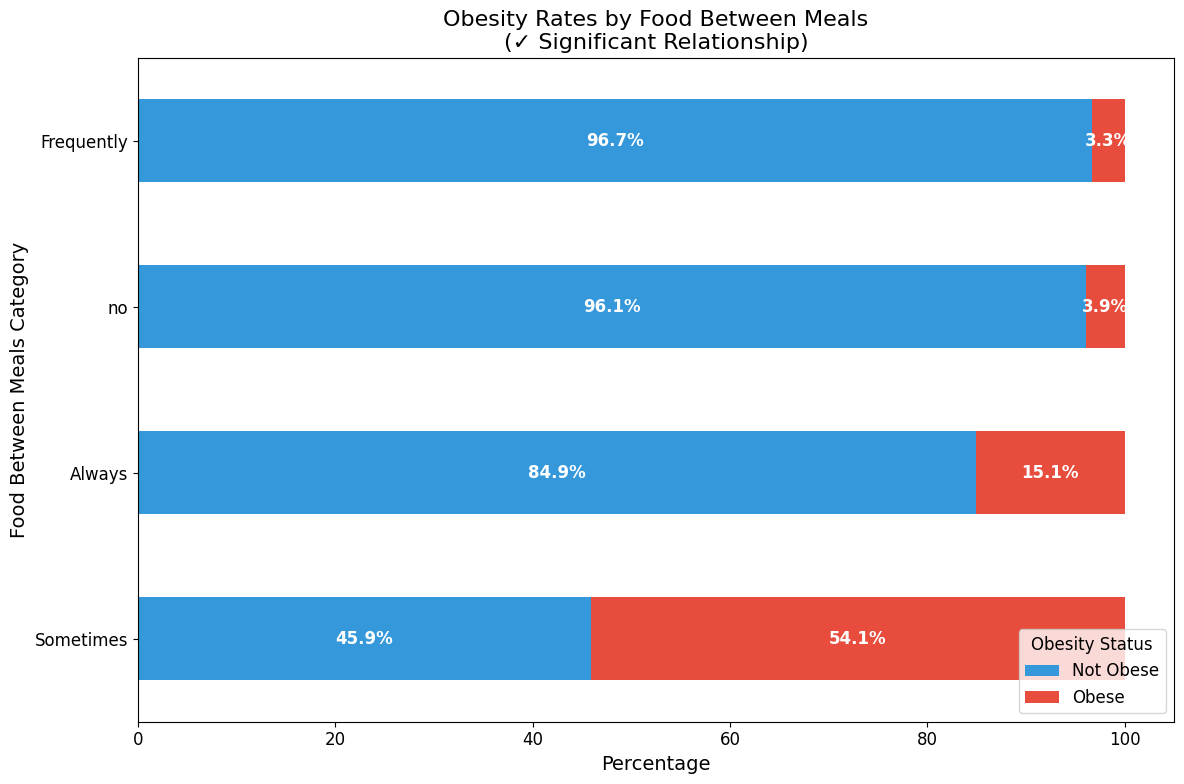

<Figure size 1400x800 with 0 Axes>

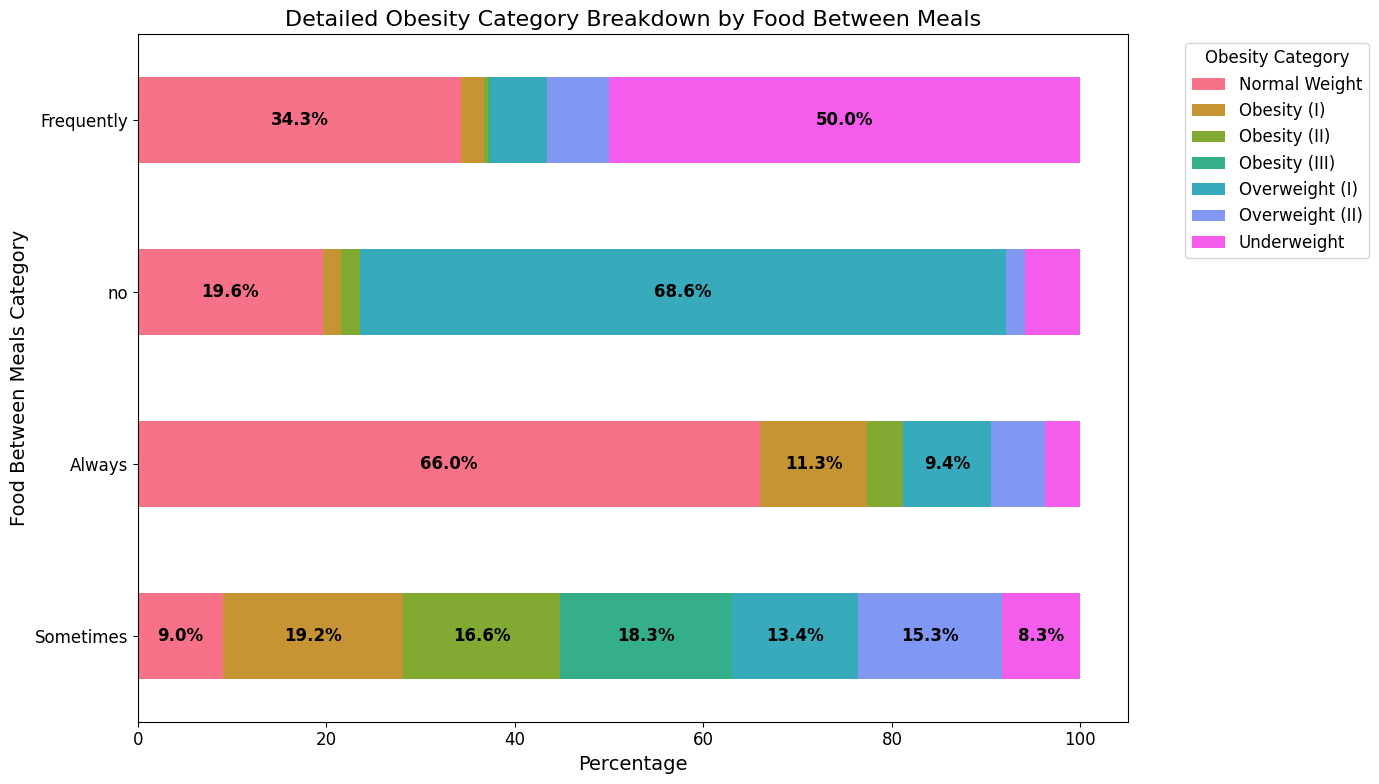

<Figure size 1200x800 with 0 Axes>

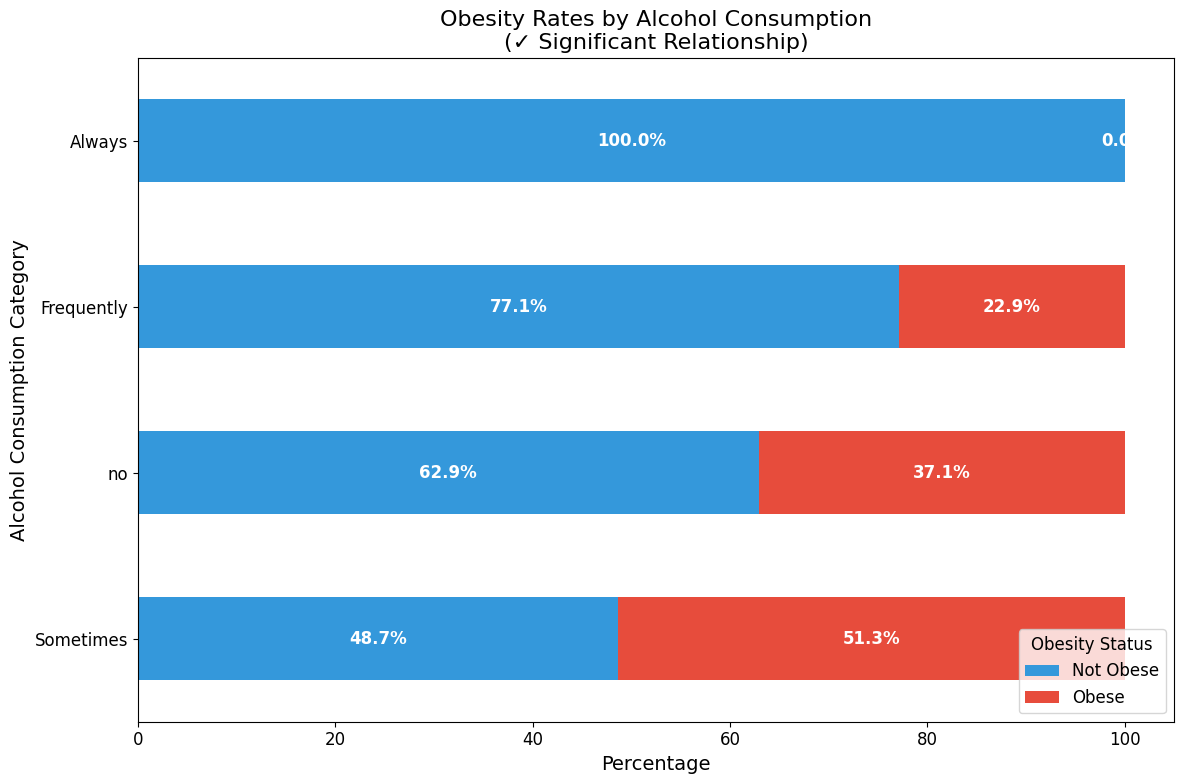

<Figure size 1400x800 with 0 Axes>

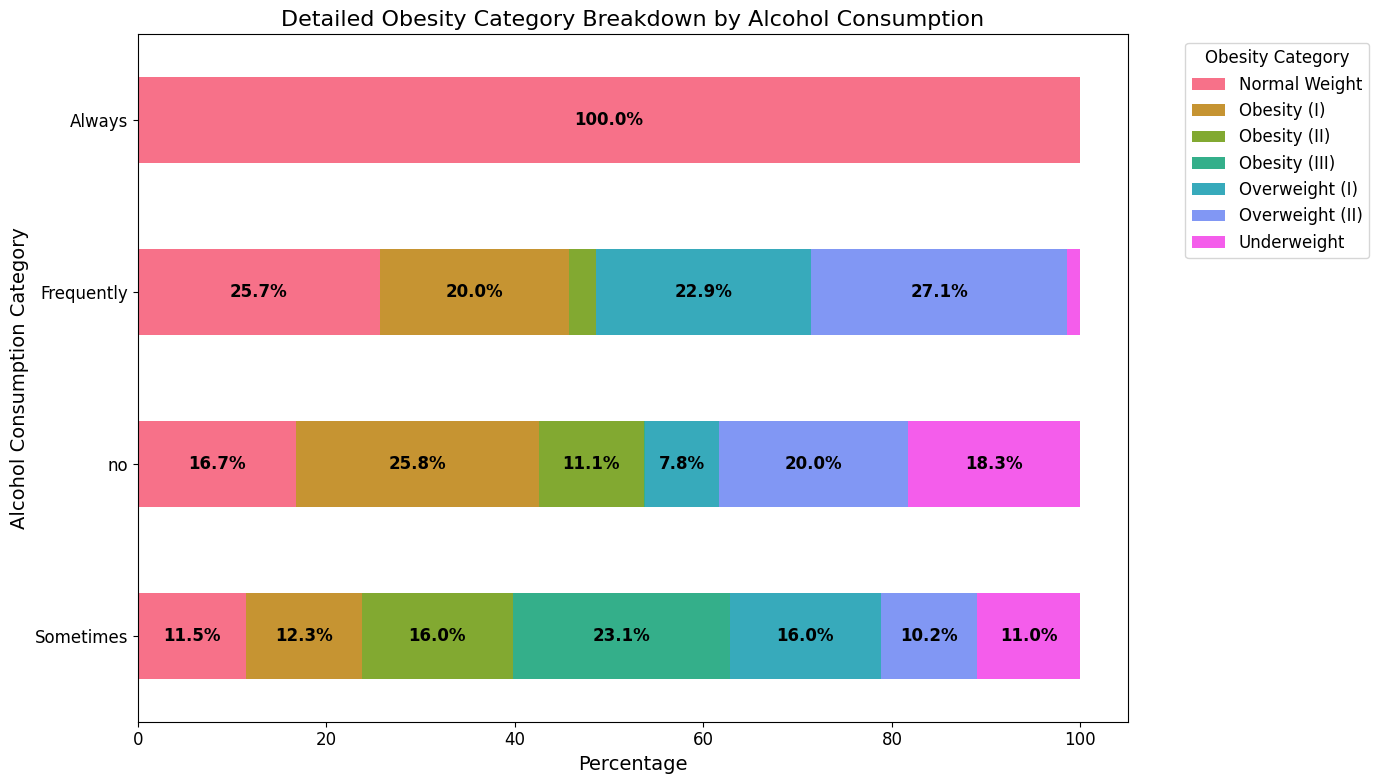

<Figure size 1200x800 with 0 Axes>

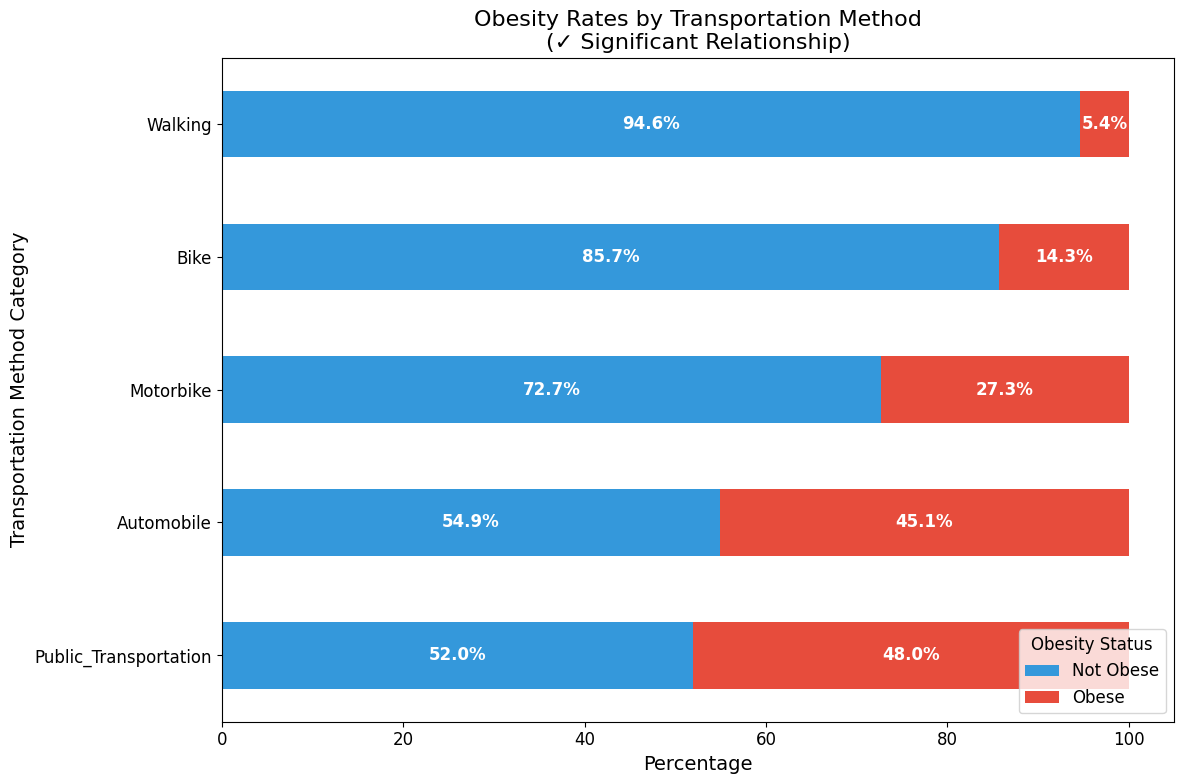

<Figure size 1400x800 with 0 Axes>

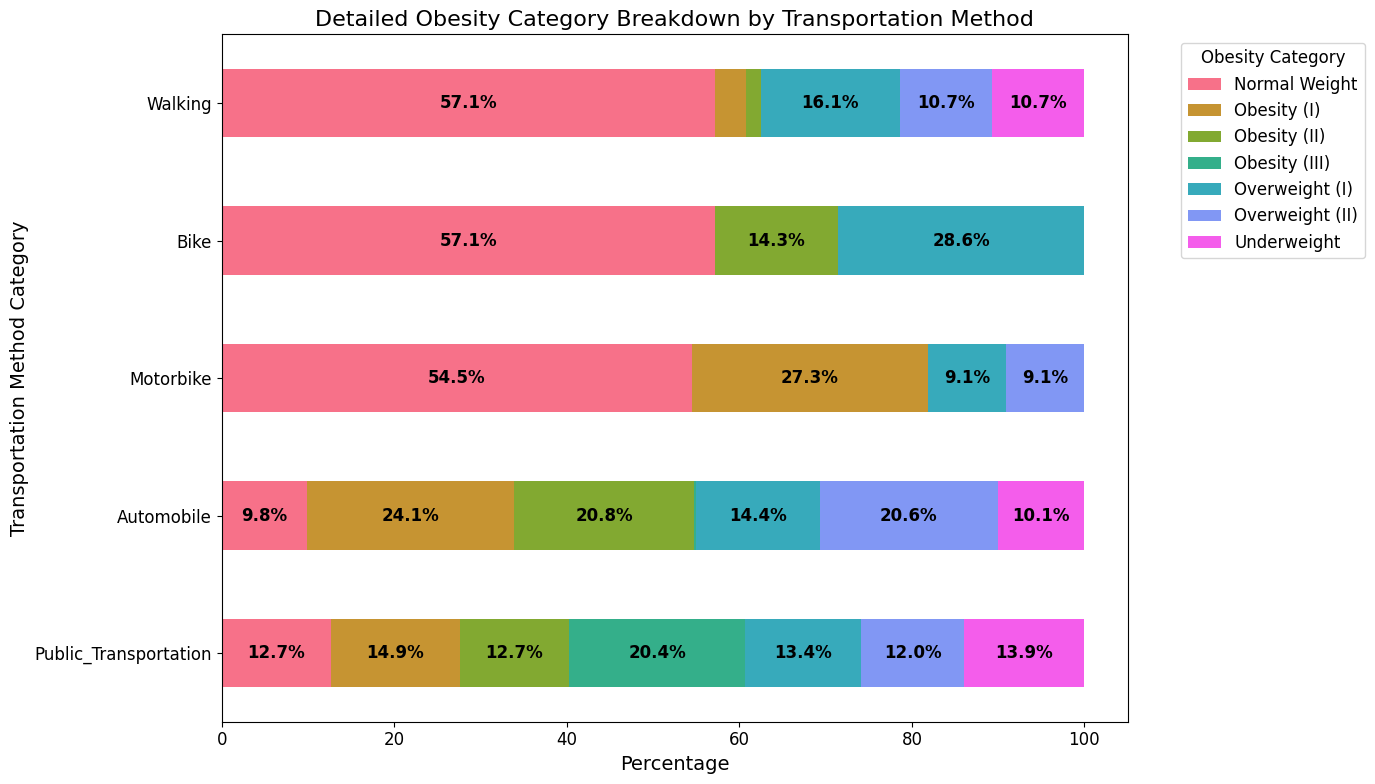

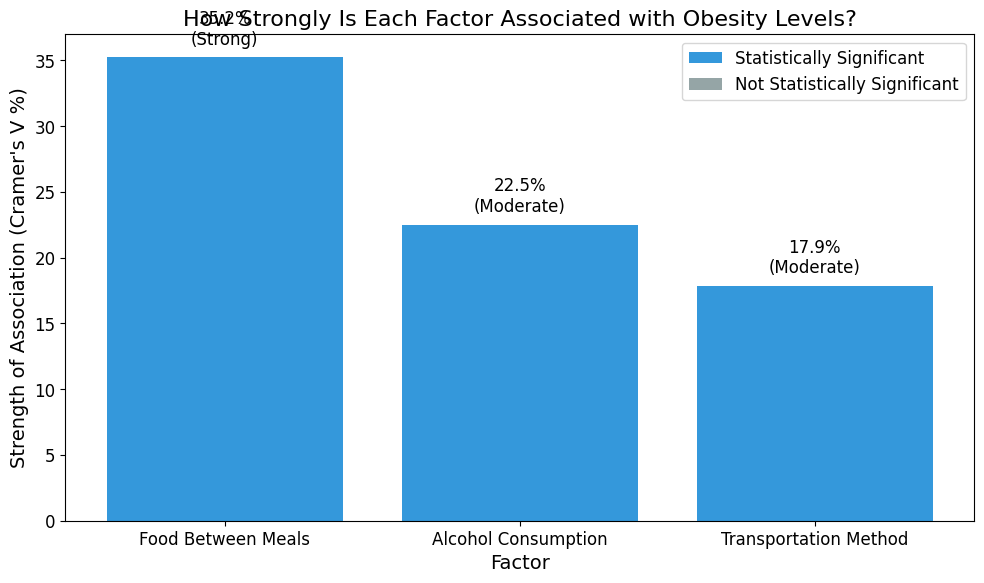


Analysis complete! The visualizations provide an accessible summary of the findings.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io
import scipy.stats as stats
from matplotlib.patches import Patch
from scipy.stats import chi2_contingency, normaltest, shapiro
import matplotlib.colors as mcolors

# Step 1: Upload file
print("Please upload the ObesityDataSet.csv file when prompted...")
uploaded = files.upload()

# Step 2: Read the uploaded file using the correct file name
file_name = list(uploaded.keys())[0]
print(f"Uploaded file: {file_name}")
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

# Step 3: Rename the variables as requested
df = df.rename(columns={
    'CAEC': 'cons_food_btwn_meals',
    'CALC': 'cons_alc',
    'MTRANS': 'transp_type',
    'NObeyesdad': 'Obesity_Level'
})

# Step 4: Create more readable labels for variables and categories
friendly_names = {
    'cons_food_btwn_meals': 'Food Between Meals',
    'cons_alc': 'Alcohol Consumption',
    'transp_type': 'Transportation Method',
    'Obesity_Level': 'Obesity Level'
}

# Create more readable labels for obesity levels
df['Obesity_Category'] = df['Obesity_Level'].map({
    'Insufficient_Weight': 'Underweight',
    'Normal_Weight': 'Normal Weight',
    'Overweight_Level_I': 'Overweight (I)',
    'Overweight_Level_II': 'Overweight (II)',
    'Obesity_Type_I': 'Obesity (I)',
    'Obesity_Type_II': 'Obesity (II)',
    'Obesity_Type_III': 'Obesity (III)'
})

# Step 5: Create binary obesity variable for simpler analysis
obesity_categories = {
    'Insufficient_Weight': 'Not Obese',
    'Normal_Weight': 'Not Obese',
    'Overweight_Level_I': 'Not Obese',
    'Overweight_Level_II': 'Not Obese',
    'Obesity_Type_I': 'Obese',
    'Obesity_Type_II': 'Obese',
    'Obesity_Type_III': 'Obese'
}
df['binary_obesity'] = df['Obesity_Level'].map(obesity_categories)

# Step 6: Define variables to analyze
categorical_vars = ['cons_food_btwn_meals', 'cons_alc', 'transp_type']

# Step 7: Check for missing values
print("\nChecking for missing values:")
print(df[categorical_vars + ['Obesity_Level']].isnull().sum())

# Step 8: Test for normality in converted numeric variables
print("\n==== NORMALITY TESTS ====")
# For categorical variables, we need to convert to numeric first
normality_results = []

for var in categorical_vars:
    print(f"\nTesting normality for {friendly_names[var]}:")

    # Create dummy variables for categories
    dummies = pd.get_dummies(df[var], prefix=var)

    # Test normality for each dummy variable
    for column in dummies.columns:
        if len(dummies[column]) <= 5000:  # Shapiro-Wilk has a sample size limit
            stat, p_shapiro = shapiro(dummies[column])
            test_name = "Shapiro-Wilk"
            p_value = p_shapiro
        else:
            stat, p_dagostino = normaltest(dummies[column])
            test_name = "D'Agostino"
            p_value = p_dagostino

        is_normal = p_value > 0.05

        # Store results
        normality_results.append({
            'Variable': var,
            'Category': column,
            'Test': test_name,
            'p_value': p_value,
            'Normal': is_normal
        })

        # Print result
        print(f"  {column} - {test_name} test: p-value = {p_value:.4f}")
        if is_normal:
            print(f"    This category appears normally distributed")
        else:
            print(f"    This category does NOT appear normally distributed")

# Convert to DataFrame for easy analysis
normality_df = pd.DataFrame(normality_results)
print("\nSummary of Normality Test Results:")
print(normality_df.groupby(['Variable'])['Normal'].value_counts())

# Whether all variables are normally distributed
all_normal = normality_df['Normal'].all()
print(f"\nAll categories normally distributed? {all_normal}")
print("\nSince we're working with categorical data, we'll use non-parametric chi-square tests")

# Step 9: Perform Chi-Square tests against Obesity Level
print("\n==== CHI-SQUARE TESTS ====")
chi_square_results = []

for var in categorical_vars:
    print(f"\nChi-Square Test: {friendly_names[var]} vs Obesity Level")
    print("-" * 50)

    # Create contingency table with Obesity Category (more readable)
    contingency_table = pd.crosstab(df[var], df['Obesity_Category'])
    print("\nContingency Table:")
    print(contingency_table)

    # Perform chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Store results
    chi_square_results.append({
        'Variable': var,
        'Friendly_Name': friendly_names[var],
        'Chi_Square': chi2,
        'p_value': p,
        'DoF': dof,
        'Significant': p < 0.05
    })

    # Print results
    print(f"\nChi-square statistic: {chi2:.4f}")
    print(f"p-value: {p:.4f}")
    print(f"Degrees of freedom: {dof}")

    # Interpret the result in plain language
    if p < 0.05:
        print(f"RESULT: There IS a significant relationship between {friendly_names[var]} and obesity.")
    else:
        print(f"RESULT: There is NO significant relationship between {friendly_names[var]} and obesity.")

    # Check chi-square assumptions (expected frequencies > 5)
    if (expected < 5).any():
        print("\nNote: Some expected frequencies are less than 5, which may affect chi-square validity.")
        print("Fisher's exact test might be more appropriate for small cell counts.")

    # Calculate and show standardized residuals to identify which cells contribute most
    residuals = contingency_table.values - expected
    std_residuals = residuals / np.sqrt(expected)

    print("\nStandardized Residuals (values > 2 or < -2 indicate significant contributions):")
    std_residuals_df = pd.DataFrame(std_residuals,
                                    index=contingency_table.index,
                                    columns=contingency_table.columns)
    print(std_residuals_df)

# Convert to DataFrame for easy display
chi_square_df = pd.DataFrame(chi_square_results)
print("\nSummary of Chi-Square Results:")
print(chi_square_df[['Friendly_Name', 'Chi_Square', 'p_value', 'Significant']])

# Step 10: Create visualizations for a lay audience
# First, create a summary of which variables are associated with obesity
plt.figure(figsize=(10, 6))

# Create color-coded bars for p-values
colors = ['#2ecc71' if sig else '#e74c3c' for sig in chi_square_df['Significant']]

# Create horizontal bar chart of -log10(p-value)
plt.barh(chi_square_df['Friendly_Name'], -np.log10(chi_square_df['p_value']), color=colors)

# Add vertical line at significance threshold (-log10(0.05) ≈ 1.3)
plt.axvline(x=-np.log10(0.05), color='black', linestyle='--')

# Add labels and title
plt.xlabel('-log10(p-value)', fontsize=14)
plt.title('Which Lifestyle Factors Are Associated with Obesity?', fontsize=16)

# Add explanation text
plt.text(-np.log10(0.05) + 0.2, len(chi_square_df) - 0.5, 'Significance\nThreshold', ha='left', va='center')

# Add a legend
legend_elements = [
    Patch(facecolor='#2ecc71', label='Significant Relationship'),
    Patch(facecolor='#e74c3c', label='No Significant Relationship')
]
plt.legend(handles=legend_elements, loc='lower right')

plt.tight_layout()
plt.show()

# Create individual visualizations for each variable
for var in categorical_vars:
    plt.figure(figsize=(12, 8))

    # Get friendly name for titles
    friendly_var = friendly_names[var]

    # Calculate percentages for stacked bar chart
    # This shows the distribution of obesity levels within each category of the variable
    ct = pd.crosstab(df[var], df['binary_obesity'], normalize='index') * 100

    # Sort categories by obesity percentage
    ct_sorted = ct.sort_values(by='Obese', ascending=False)

    # Create stacked percentage bar chart
    ax = ct_sorted.plot(kind='barh', stacked=True, figsize=(12, 8),
                      color=['#3498db', '#e74c3c'])

    # Add percentage labels on bars
    for i, (idx, row) in enumerate(ct_sorted.iterrows()):
        # Label for "Not Obese"
        plt.text(row['Not Obese']/2, i, f"{row['Not Obese']:.1f}%",
                 ha='center', va='center', color='white', fontweight='bold')

        # Label for "Obese"
        plt.text(row['Not Obese'] + row['Obese']/2, i, f"{row['Obese']:.1f}%",
                 ha='center', va='center', color='white', fontweight='bold')

    # Get significance from results
    is_significant = chi_square_df[chi_square_df['Variable'] == var]['Significant'].values[0]

    # Create title with significance indication
    if is_significant:
        title = f"Obesity Rates by {friendly_var}\n(✓ Significant Relationship)"
    else:
        title = f"Obesity Rates by {friendly_var}\n(✗ No Significant Relationship)"

    plt.title(title, fontsize=16)
    plt.xlabel('Percentage', fontsize=14)
    plt.ylabel(f'{friendly_var} Category', fontsize=14)
    plt.legend(title='Obesity Status', loc='lower right')
    plt.tight_layout()
    plt.show()

    # Now create a more detailed breakdown with all obesity categories
    plt.figure(figsize=(14, 8))

    # Create a more detailed crosstab
    detailed_ct = pd.crosstab(df[var], df['Obesity_Category'])

    # Convert to percentages
    detailed_ct_pct = detailed_ct.div(detailed_ct.sum(axis=1), axis=0) * 100

    # Sort categories based on highest obesity percentage
    obesity_cols = ['Obesity (I)', 'Obesity (II)', 'Obesity (III)']
    total_obesity = detailed_ct_pct[obesity_cols].sum(axis=1)
    detailed_ct_pct_sorted = detailed_ct_pct.loc[total_obesity.sort_values(ascending=False).index]

    # Use a colorblind-friendly palette
    colors = sns.color_palette("husl", len(detailed_ct_pct_sorted.columns))

    # Create stacked bar chart
    ax = detailed_ct_pct_sorted.plot(kind='barh', stacked=True, figsize=(14, 8),
                                  color=colors)

    # Annotate percentages for better readability (only for larger percentages)
    for i, (idx, row) in enumerate(detailed_ct_pct_sorted.iterrows()):
        cumulative = 0
        for j, col in enumerate(detailed_ct_pct_sorted.columns):
            if row[col] > 7:  # Only label if percentage is large enough
                plt.text(cumulative + row[col]/2, i, f"{row[col]:.1f}%",
                         ha='center', va='center', color='black', fontweight='bold')
            cumulative += row[col]

    plt.title(f"Detailed Obesity Category Breakdown by {friendly_var}", fontsize=16)
    plt.xlabel('Percentage', fontsize=14)
    plt.ylabel(f'{friendly_var} Category', fontsize=14)
    plt.legend(title='Obesity Category', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Step 11: Create a summary visualization showing association strengths
plt.figure(figsize=(10, 6))

# Calculate Cramer's V for effect size
def cramers_v(contingency_table):
    chi2 = chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    phi2 = chi2/n
    r, k = contingency_table.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1), (rcorr-1)))

# Calculate and store Cramer's V for each variable
effect_sizes = []
for var in categorical_vars:
    contingency_table = pd.crosstab(df[var], df['Obesity_Category'])
    v = cramers_v(contingency_table)

    is_significant = chi_square_df[chi_square_df['Variable'] == var]['Significant'].values[0]

    effect_sizes.append({
        'Variable': var,
        'Friendly_Name': friendly_names[var],
        'Cramers_V': v,
        'Significant': is_significant
    })

# Convert to DataFrame and sort by effect size
effect_df = pd.DataFrame(effect_sizes)
effect_df = effect_df.sort_values('Cramers_V', ascending=False)

# Create bar chart of effect sizes
colors = ['#3498db' if sig else '#95a5a6' for sig in effect_df['Significant']]
plt.bar(effect_df['Friendly_Name'], effect_df['Cramers_V'] * 100, color=colors)

# Add labels
plt.title('How Strongly Is Each Factor Associated with Obesity Levels?', fontsize=16)
plt.ylabel('Strength of Association (Cramer\'s V %)', fontsize=14)
plt.xlabel('Factor', fontsize=14)

# Add value labels on bars
for i, v in enumerate(effect_df['Cramers_V']):
    # Determine effect size category
    if v < 0.1:
        strength = "Weak"
    elif v < 0.3:
        strength = "Moderate"
    else:
        strength = "Strong"

    plt.text(i, v * 100 + 1, f"{v*100:.1f}%\n({strength})", ha='center')

# Add a legend
legend_elements = [
    Patch(facecolor='#3498db', label='Statistically Significant'),
    Patch(facecolor='#95a5a6', label='Not Statistically Significant')
]
plt.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()

print("\nAnalysis complete! The visualizations provide an accessible summary of the findings.")